In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#Statistics
# Statistics
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.special import inv_boxcox
from scipy.stats import boxcox
from scipy.interpolate import interp1d

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from dateutil.parser import parse 
import pickle

# READ CSV AND DESCRIPTION OF SERIES


In [2]:
#BLOCK HEIGHT
block_height = pd.read_csv("data/bitcoin-block-height.csv")

block_height["Block Height/t"] = block_height["Block Height/t"].str.rstrip("T00:00:00.000Z")
block_height["Block Height/t"] = pd.to_datetime(block_height["Block Height/t"])
block_height = block_height.sort_values(by='Block Height/t')
block_height = block_height.rename(columns={'Block Height/t': 'Timestamp', 'Block Height/v': 'Value'})

#Description
print(block_height.head())
print("\nShape is:", block_height.shape)
print("\nSummary of the dataset:")
block_height.describe()
print("\nAre there null values?")
block_height.isna().sum()

    Timestamp  Value
1  2009-01-01     75
11 2009-01-02   1193
21 2009-01-03   2405
0  2009-01-09     14
2  2009-01-11    168

Shape is: (4982, 2)

Summary of the dataset:

Are there null values?


Timestamp    0
Value        0
dtype: int64

# VISUALIZATION

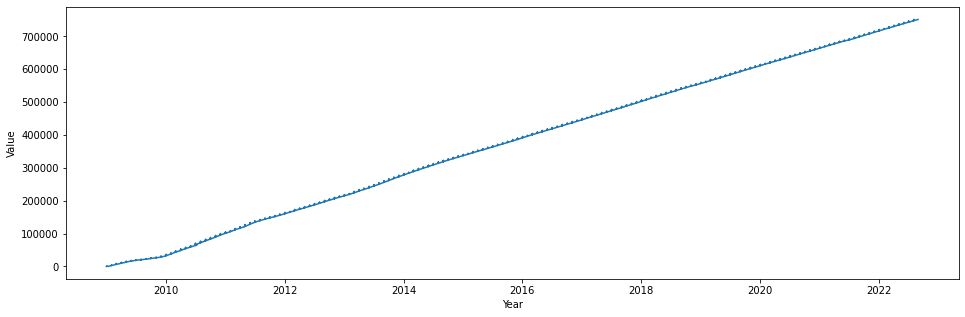

In [3]:
plt.figure(figsize=(16,5))
plt.plot(block_height["Timestamp"], block_height["Value"])
plt.gca().set(xlabel="Year", ylabel="Value")
#scommentare riga giù per visualizzare in scala log
#plt.yscale('log') 
plt.show()

#FIX THIS VIS LIKE GLASSNODE

#CAPIRE PERCHE' SI VEDONO QUEI "PICCHI" (credo si vedano perchè il range y è troppo alto)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


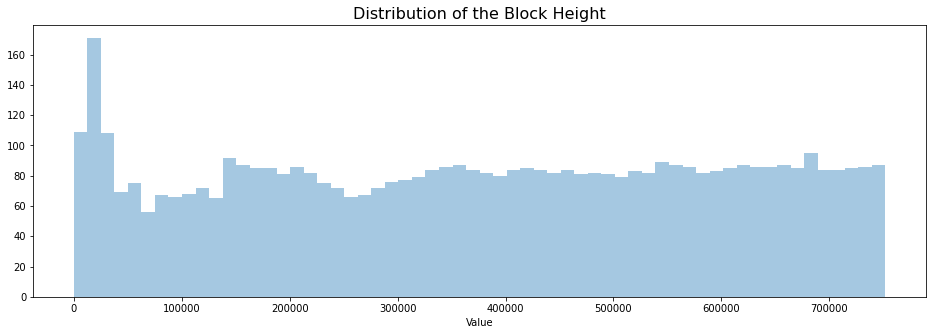

In [4]:
plt.figure(figsize=(16,5))
sns.distplot(block_height["Value"], kde = False, bins = 60)
plt.title('Distribution of the Block Height', fontsize=16)
plt.show()